In [1]:
!pip install python_speech_features

  Stored in directory: C:\Users\smhrd08\AppData\Local\pip\Cache\wheels\3c\42\7c\f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [1]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import python_speech_features
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## 훈련 데이터 불러오기

In [84]:
bad_path = 'C:/Users/smhrd15/3차프로젝트/bad영상'
good_path = 'C:/Users/smhrd15/3차프로젝트/good영상'

In [85]:
bad_list = os.listdir(bad_path)
good_list = os.listdir(good_path)

## 영상 -> 음성

In [90]:
import moviepy.editor as mp

In [117]:
clip = mp.VideoFileClip("미선.mp4").subclip()
clip.audio.write_audiofile("미선.wav")
clip = mp.VideoFileClip("진우.mp4").subclip()
clip.audio.write_audiofile("진우.wav")

MoviePy - Writing audio in 미선.wav


MoviePy - Done.
MoviePy - Writing audio in 진우.wav


MoviePy - Done.


In [ ]:
# ===========훈련 데이터=========================

# bad_data
for i in range(len(bad_list)):
    try:
        clip = mp.VideoFileClip('bad영상/'+bad_list[i]).subclip()
        clip.audio.write_audiofile('bad영상/'+bad_list[i].split('.')[0]+'.wav')
    except:
        print('에러낫슈')
# good_data
for i in range(len(good_list)):
    try:
        clip = mp.VideoFileClip('good영상/'+good_list[i]).subclip()
        clip.audio.write_audiofile('good영상/'+good_list[i].split('.')[0]+'.wav')
    except:
        print('에러낫슈')

### 훈련 wav파일 리스트 불러오기

In [3]:
bad_ = 'C:/Users/smhrd15/3차프로젝트/bad영상'
good_ = 'C:/Users/smhrd15/3차프로젝트/good영상'
bad_list = os.listdir(bad_)
good_list = os.listdir(good_)

In [4]:
bad_wav = []
good_wav = []
for i in bad_list:
    if i.split('.')[1] == 'wav':
        bad_wav.append(i)
        
for i in good_list:
    if i.split('.')[1] == 'wav':
        good_wav.append(i)

## mfcc 이론

In [ ]:
1. 입력 시간 도메인의 소리 신호를 작은 크기 프레임으로 자른다

2. 각 프레임에 대하여 Power Spectrum의 Periodogram estimate (Periodogram Spectral Estimate)를 계산한다.

3. 2번에서 구한 Power Spectrum 에 Mel Filter bank를 적용하고, 각 필터에 에너지를 합한다.

4. 3번에서 구한 모든 필터 뱅크 에너지의 Log를 취한다.

5. 4번 값에 DCT를 취한다.

6. DCT를 취한 값에 Coefficients 2~13 만 남기고 나머지는 버린다.

In [101]:
#===================훈련데이터 ========================

#good
mfcc_good = [1,1,1,1,1,1,1,1,1,1,1,1,1]
for i in good_wav:
    (rate,sig) = wav.read('good영상/'+i)
    mfcc_feat = mfcc(sig,rate)
    mfcc_good = np.vstack([mfcc_good, mfcc_feat])

In [99]:
#===================훈련데이터 ========================

#bad
mfcc_bad = [1,1,1,1,1,1,1,1,1,1,1,1,1]
for i in bad_wav:
    (rate,sig) = wav.read('bad영상/'+str(i))
    mfcc_feat = mfcc(sig,rate)
    mfcc_bad = np.vstack([mfcc_bad, mfcc_feat])


In [103]:
#===================훈련데이터 ========================

mfcc_bad = mfcc_bad[1:]
mfcc_good = mfcc_good[1:]

### 훈련데이터 concat

In [106]:
X = np.concatenate((data_bad, data_good))
X.shape

(39610, 40, 13)

In [107]:
X1 = X.reshape(39610,40,13,1)

In [108]:
X1.shape

(39610, 40, 13, 1)

### label (0:비정상, 1:정상)

In [109]:
y = np.array([0]*len(data_bad) + [1]*len(data_good))
print(y.shape)

(39610,)


### train, test

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X1,y)

In [112]:
y_train

array([0, 1, 1, ..., 1, 0, 0])

### CNN

In [6]:
from keras.models import Sequential # Dense쌓기전에 어떤순서로 쌓을지 틀을 만들어줌
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Embedding
from keras.layers.wrappers import TimeDistributed
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [7]:
model = Sequential()

# TimeDistributed : 모델에 데이터가 순차적임을 아릴고 시퀀스의 각 요소에 일부 레이어를 적용
#                -> LSTM을 쓰기위해
model.add(Conv2D(filters=32,
                 kernel_size=(2,2),
                 activation = 'relu',
                 padding = 'same',
                 input_shape = (40,13,1))) # 중요 ! 처음만 input_shape줘야함


model.add(Conv2D(filters=64,
                 kernel_size=(2,2),
                 activation = 'relu',
                 padding = 'same'))




model.add(Conv2D(filters=256,
                 kernel_size=(2,2),
                 activation = 'relu',
                 padding = 'same'))


model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 activation = 'relu',
                 padding = 'same'))



model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 13, 32)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 13, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 13, 256)       65792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 40, 13, 512)       1180160   
_________________________________________________________________
flatten_1 (Flatten)          (None, 266240)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               34078848  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [8]:
early = EarlyStopping(monitor="val_loss",patience=20)
checkpoint = ModelCheckpoint(filepath="model/voice_{epoch:04d}-{val_accuracy:.4f}.hdf5",monitor="val_accuracy",verbose=1,save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, verbose=2, callbacks=[early,checkpoint],
                    epochs=200,
                    validation_data=(X_test, y_test))

In [ ]:
model.evaluate(X_test,y_test)

### CNN+LSTM

In [9]:
model_lstm2 = Sequential()

# TimeDistributed : 모델에 데이터가 순차적임을 알리고 시퀀스의 각 요소에 일부 레이어를 적용
#                -> LSTM을 쓰기위해 , 3차원을 받을 수 있게
model_lstm2.add(Conv2D(filters=8,
                 kernel_size=(3,3),
                 activation = 'relu',
                 padding = 'same',
                 input_shape = (40,13,1)))# 중요 ! 처음만 input_shape줘야함


model_lstm2.add(Conv2D(filters=8,
                 kernel_size=(3,3),
                 activation = 'relu',
                 padding = 'same'))


model_lstm2.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                 activation = 'relu',
                 padding = 'same'))


model_lstm2.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                 activation = 'relu',
                 padding = 'same'))

model_lstm2.add(TimeDistributed(Flatten()))

model_lstm2.add(LSTM(32, activation='tanh'))



model_lstm2.add(Dense(32, activation='relu'))
model_lstm2.add(Dense(1, activation='sigmoid'))

model_lstm2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
model_lstm2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 40, 13, 8)         80        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 40, 13, 8)         584       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 40, 13, 16)        1168      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 13, 16)        2320      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 40, 208)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                30848     
_________________________________________________________________
dense_3 (Dense)              (None, 32)               

### LSTM

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
# 위에 shape보고 다시 차원하나 줄여주기
X_train_lstm = X_train.reshape(5940,200,13)
X_test_lstm = X_test.reshape(1981,200,13)

In [ ]:
lstm = Sequential()

lstm.add(LSTM(32, activation='tanh', input_shape=(200,13)))

lstm.add(Dense(32, activation='relu'))
lstm.add(Dense(1, activation='sigmoid'))

lstm.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
checkpoint_lstm = ModelCheckpoint(filepath="model/onlylstm_{epoch:04d}-{val_accuracy:.4f}.hdf5",monitor="val_accuracy",verbose=1,save_best_only=True)

In [ ]:
history = lstm.fit(X_train_lstm, y_train, verbose=2, callbacks=[early,checkpoint_lstm],
                    epochs=200,
                    validation_data=(X_test_lstm, y_test))

### GRU

In [ ]:
gru = Sequential()

gru.add(GRU(32, activation='tanh', input_shape=(40,13)))

gru.add(Dense(32, activation='relu'))
gru.add(Dense(1, activation='sigmoid'))

gru.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
checkpoint_gru = ModelCheckpoint(filepath="model/onlygru_{epoch:04d}-{val_accuracy:.4f}.hdf5",monitor="val_accuracy",verbose=1,save_best_only=True)

In [ ]:
history = gru.fit(X_train_lstm, y_train, verbose=2, callbacks=[early,checkpoint_gru],
                    epochs=200,
                    validation_data=(X_test_lstm, y_test))

## mfcc 구현

In [6]:
#=====test==========================
(rate,sig) = wav.read("result/김미선20191028/김미선.wav")
mfcc_feat_미 = mfcc(sig,rate)

In [5]:
import scipy.io.wavfile as wav
from python_speech_features import mfcc

### list형태로

In [11]:
rate

16000

In [12]:
# 1초 기준
data_미선 = mfcc_feat_미[:len(mfcc_feat_미)//(100)*100].reshape(1,-1).reshape(len(mfcc_feat_미)//100,100,13)


In [13]:
print('미선',data_미선.shape)
#print('진우',data_진우.shape)


미선 (58, 100, 13)


### 모델 불러오기

In [14]:
from keras.models import load_model

In [21]:
model = load_model('model/onlylstm2_0031-0.9541.hdf5')

In [19]:
data_미선.shape

(58, 200, 13)

In [ ]:
# lstm 이외의 모델을 쓸 경우

# 미선 = data_미선.reshape(291,40,13,1)
# 진우 = data_진우.reshape(382,40,13,1)

# pre_미선 = model.predict(미선)
# pre_진우 = model.predict(진우)

In [22]:
pre_미선 = model.predict(data_미선)
pre_진우 = model.predict(data_진우)

In [23]:
#한글깨짐 방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [25]:
print('미선',len(pre_미선))
print('진우',len(pre_진우))

미선 58
진우 76


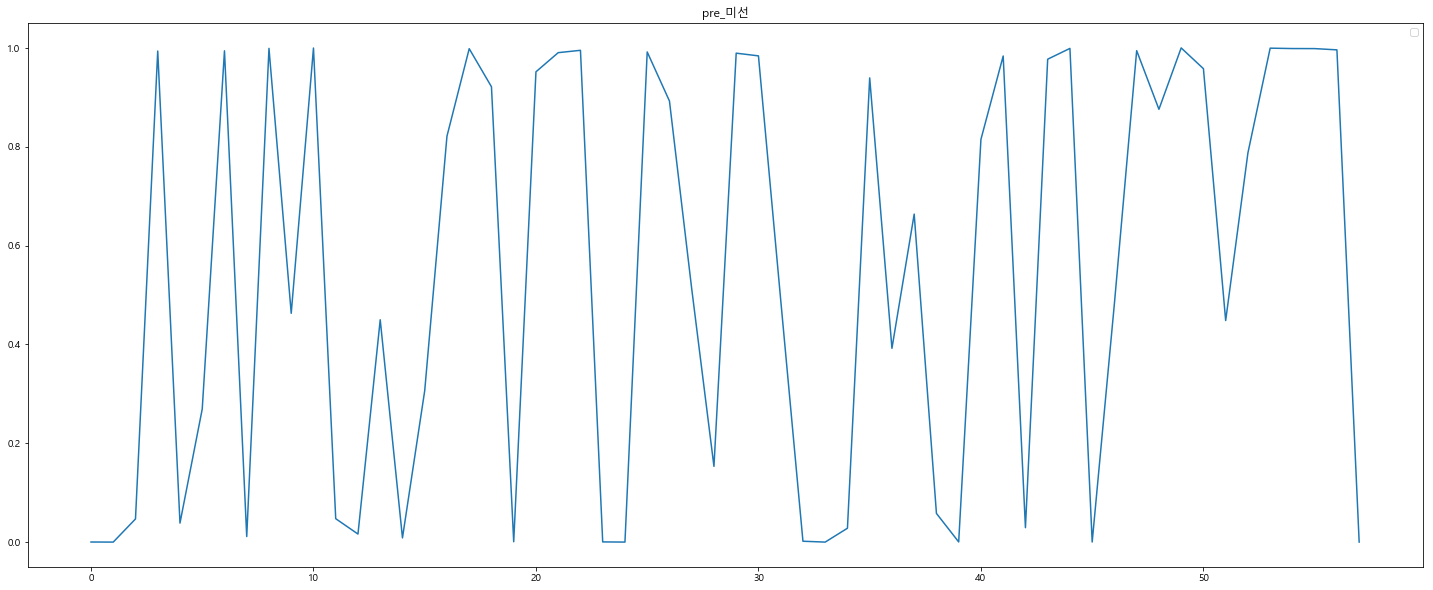

In [26]:
plt.figure(figsize=(25,10))
plt.plot(pre_미선)
plt.title('pre_미선')
plt.legend()
plt.show()

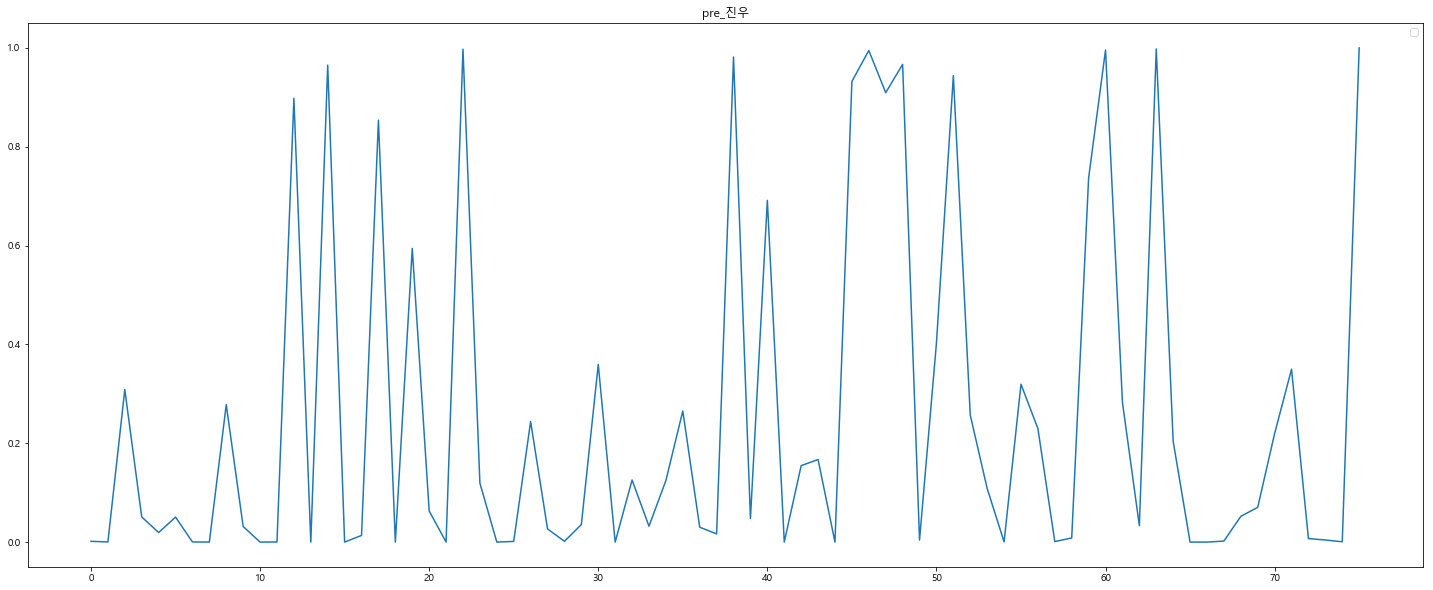

In [27]:
plt.figure(figsize=(25,10))
plt.plot(pre_진우)
plt.title('pre_진우')
plt.legend()
plt.show()